# Estudio de Correlación de Edad, Colesterol y Presión Arterial en Mujeres mayores de 50 años: Un Enfoque en Salud Cardiovascular

Manu Siddhartha. (2020). Heart Disease Dataset (Comprehensive). IEEE Dataport. https://dx.doi.org/10.21227/dz4t-cm36

Este dataset combina 5 popular datasets populares, donde contiene over 11 columnas con datos sobre enfermedad cardiovascular, permitiendo así su uso para una gran cantidad de estudios de análisis de datos y Machine Learning. Se usan datasets de las siguientes regiones en esta combinación:

Cleveland,
Hungarian,
Switzerland,
Long Beach VA,
Statlog (Heart) Data Set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

heartdisease = pd.read_csv(r"C:\Users\X\Desktop\Sprint 10 Proyecto\heart_statlog_cleveland_hungary_final.csv")
heartdisease.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [2]:
heartdisease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


Empiezo a realizar cambios de acuerdo a la documentación elaborada por los investigadores que crearon el dataset, adjunta en este mismo repositorio.
Ya que los datos categóricos se encuentran representados con números, prefiero hacer estos cambios para que no exista confusión

Cambio el formato de la variable categórica "sex" de numérico a string 1 = masculino, 0= femenino;

In [3]:
heartdisease['sex'] = heartdisease['sex'].astype(str)
heartdisease['sex'] = heartdisease['sex'].str.replace('0', 'femenino')
heartdisease['sex'] = heartdisease['sex'].str.replace('1', 'masculino')
heartdisease.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,masculino,2,140,289,0,0,172,0,0.0,1,0
1,49,femenino,3,160,180,0,0,156,0,1.0,2,1
2,37,masculino,2,130,283,0,1,98,0,0.0,1,0
3,48,femenino,4,138,214,0,0,108,1,1.5,2,1
4,54,masculino,3,150,195,0,0,122,0,0.0,1,0


Cambio también la variable categórica de tipo de dolor de pecho
-- Valor 1: angina típica
-- Valor 2: angina atípica 
-- Valor 3: dolor no anginoso
-- Valor 4: asintomático

In [4]:
heartdisease['chest pain type'] = heartdisease['chest pain type'].astype(str)
heartdisease['chest pain type'] = heartdisease['chest pain type'].str.replace('1', 'angina típica')
heartdisease['chest pain type'] = heartdisease['chest pain type'].str.replace('2', 'angina atípica')
heartdisease['chest pain type'] = heartdisease['chest pain type'].str.replace('3', 'dolor no anginoso')
heartdisease['chest pain type'] = heartdisease['chest pain type'].str.replace('4', 'asintomático')
heartdisease.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,masculino,angina atípica,140,289,0,0,172,0,0.0,1,0
1,49,femenino,dolor no anginoso,160,180,0,0,156,0,1.0,2,1
2,37,masculino,angina atípica,130,283,0,1,98,0,0.0,1,0
3,48,femenino,asintomático,138,214,0,0,108,1,1.5,2,1
4,54,masculino,dolor no anginoso,150,195,0,0,122,0,0.0,1,0


Cambio la variable categórica de fasting blood sugar, donde se indica si el sujeto de estudio tiene niveles glicémicos que superan los 120 mg/dl en ayuno a Glicemia_Basal_Mayor_120 (1 = verdadero; 0 = falso)

Un nivel de glicemia en ayunas superior a 100 mg/dl puede indicar que existe un riesgo de desarrollar Diabetes tipo 2, lo que puede influir en la salud cardiovascular
https://medlineplus.gov/spanish/ency/article/003482.htm

In [5]:
heartdisease = heartdisease.rename(columns={'fasting blood sugar':'Glicemia_Basal_Mayor_120'})

In [6]:
heartdisease['Glicemia_Basal_Mayor_120'] = heartdisease['Glicemia_Basal_Mayor_120'].astype(str)
heartdisease['Glicemia_Basal_Mayor_120'] = heartdisease['Glicemia_Basal_Mayor_120'].str.replace('0', 'falso')
heartdisease['Glicemia_Basal_Mayor_120'] = heartdisease['Glicemia_Basal_Mayor_120'].str.replace('1', 'verdadero')
heartdisease.head()

,age,sex,chest pain type,resting bp s,cholesterol,Glicemia_Basal_Mayor_120,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,masculino,angina atípica,140,289,falso,0,172,0,0.0,1,0
1,49,femenino,dolor no anginoso,160,180,falso,0,156,0,1.0,2,1
2,37,masculino,angina atípica,130,283,falso,1,98,0,0.0,1,0
3,48,femenino,asintomático,138,214,falso,0,108,1,1.5,2,1
4,54,masculino,dolor no anginoso,150,195,falso,0,122,0,0.0,1,0


Resultados de Electrocardiograma en reposo
--  0: normal
--  1: anormalidad de la onda ST-T(en el electrocardiograma)
--  2: hipertrofia del ventriculo izq probable o definitiva según los Criterios de Romhilt-Estes 


In [7]:
heartdisease['resting ecg'] = heartdisease['resting ecg'].astype(str)
heartdisease['resting ecg'] = heartdisease['resting ecg'].str.replace('0', 'normal')
heartdisease['resting ecg'] = heartdisease['resting ecg'].str.replace('1', 'anormalidad de la onda ST-T')
heartdisease['resting ecg'] = heartdisease['resting ecg'].str.replace('2', 'hipertrofia del ventriculo izq')
heartdisease.head()

,age,sex,chest pain type,resting bp s,cholesterol,Glicemia_Basal_Mayor_120,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,masculino,angina atípica,140,289,falso,normal,172,0,0.0,1,0
1,49,femenino,dolor no anginoso,160,180,falso,normal,156,0,1.0,2,1
2,37,masculino,angina atípica,130,283,falso,anormalidad de la onda ST-T,98,0,0.0,1,0
3,48,femenino,asintomático,138,214,falso,normal,108,1,1.5,2,1
4,54,masculino,dolor no anginoso,150,195,falso,normal,122,0,0.0,1,0


Angina inducida por el ejercicio 1 = si; 0 = no

In [8]:
heartdisease['exercise angina'] = heartdisease['exercise angina'].astype(str)
heartdisease['exercise angina'] = heartdisease['exercise angina'].str.replace('0', 'no')
heartdisease['exercise angina'] = heartdisease['exercise angina'].str.replace('1', 'si')
heartdisease.head()

,age,sex,chest pain type,resting bp s,cholesterol,Glicemia_Basal_Mayor_120,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,masculino,angina atípica,140,289,falso,normal,172,no,0.0,1,0
1,49,femenino,dolor no anginoso,160,180,falso,normal,156,no,1.0,2,1
2,37,masculino,angina atípica,130,283,falso,anormalidad de la onda ST-T,98,no,0.0,1,0
3,48,femenino,asintomático,138,214,falso,normal,108,si,1.5,2,1
4,54,masculino,dolor no anginoso,150,195,falso,normal,122,no,0.0,1,0


Pendiente del segmento ST (visualizado en electrocardiograma) en el pico del ejercicio
-- Value 1: subida
-- Value 2: plano
-- Value 3: bajada

In [9]:
heartdisease['ST slope'] = heartdisease['ST slope'].astype(str)
heartdisease['ST slope'] = heartdisease['ST slope'].str.replace('1', 'subida')
heartdisease['ST slope'] = heartdisease['ST slope'].str.replace('2', 'plano')
heartdisease['ST slope'] = heartdisease['ST slope'].str.replace('3', 'bajada')
heartdisease.head()

,age,sex,chest pain type,resting bp s,cholesterol,Glicemia_Basal_Mayor_120,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,masculino,angina atípica,140,289,falso,normal,172,no,0.0,subida,0
1,49,femenino,dolor no anginoso,160,180,falso,normal,156,no,1.0,plano,1
2,37,masculino,angina atípica,130,283,falso,anormalidad de la onda ST-T,98,no,0.0,subida,0
3,48,femenino,asintomático,138,214,falso,normal,108,si,1.5,plano,1
4,54,masculino,dolor no anginoso,150,195,falso,normal,122,no,0.0,subida,0


target (clasificación de acuerdo a si hay o no diagnóstico de enfermedades cardiovasculares) 1 = enfermedad cardiovascular, 0 = Normal

In [10]:
heartdisease['target'] = heartdisease['target'].astype(str)
heartdisease['target'] = heartdisease['target'].str.replace('0', 'normal')
heartdisease['target'] = heartdisease['target'].str.replace('1', 'enfermedad cardiovascular')
heartdisease.head()

,age,sex,chest pain type,resting bp s,cholesterol,Glicemia_Basal_Mayor_120,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,masculino,angina atípica,140,289,falso,normal,172,no,0.0,subida,normal
1,49,femenino,dolor no anginoso,160,180,falso,normal,156,no,1.0,plano,enfermedad cardiovascular
2,37,masculino,angina atípica,130,283,falso,anormalidad de la onda ST-T,98,no,0.0,subida,normal
3,48,femenino,asintomático,138,214,falso,normal,108,si,1.5,plano,enfermedad cardiovascular
4,54,masculino,dolor no anginoso,150,195,falso,normal,122,no,0.0,subida,normal


In [11]:
heartdisease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1190 non-null   int64  
 1   sex                       1190 non-null   object 
 2   chest pain type           1190 non-null   object 
 3   resting bp s              1190 non-null   int64  
 4   cholesterol               1190 non-null   int64  
 5   Glicemia_Basal_Mayor_120  1190 non-null   object 
 6   resting ecg               1190 non-null   object 
 7   max heart rate            1190 non-null   int64  
 8   exercise angina           1190 non-null   object 
 9   oldpeak                   1190 non-null   float64
 10  ST slope                  1190 non-null   object 
 11  target                    1190 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 111.7+ KB


Ya que los datos se encuentran en el formato correcto. procedo a renombrar las columnas a su versión en castellano

In [12]:
heartdisease.rename(columns={
    'age': 'Edad',
    'sex': 'Genero',
    'chest pain type': 'Tipo_Dolor_Pecho',
    'resting bp s': 'Presion_Arterial_Reposo',
    'cholesterol': 'Colesterol',
    'resting ecg': 'ECG_Reposo',
    'max heart rate': 'Frecuencia_Cardiaca_Max',
    'exercise angina': 'Angina_Ejercicio',
    'oldpeak': 'Depresion_ST',
    'ST slope': 'Pendiente_ST',
    'target': 'Estado'
}, inplace=True)

heartdisease.head()

,Edad,Genero,Tipo_Dolor_Pecho,Presion_Arterial_Reposo,Colesterol,Glicemia_Basal_Mayor_120,ECG_Reposo,Frecuencia_Cardiaca_Max,Angina_Ejercicio,Depresion_ST,Pendiente_ST,Estado
0,40,masculino,angina atípica,140,289,falso,normal,172,no,0.0,subida,normal
1,49,femenino,dolor no anginoso,160,180,falso,normal,156,no,1.0,plano,enfermedad cardiovascular
2,37,masculino,angina atípica,130,283,falso,anormalidad de la onda ST-T,98,no,0.0,subida,normal
3,48,femenino,asintomático,138,214,falso,normal,108,si,1.5,plano,enfermedad cardiovascular
4,54,masculino,dolor no anginoso,150,195,falso,normal,122,no,0.0,subida,normal


Elimino los duplicados en caso de que existan

In [13]:
heartdisease.drop_duplicates(inplace=True)
heartdisease.shape

(918, 12)

In [14]:
heartdisease.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Edad                      918 non-null    int64  
 1   Genero                    918 non-null    object 
 2   Tipo_Dolor_Pecho          918 non-null    object 
 3   Presion_Arterial_Reposo   918 non-null    int64  
 4   Colesterol                918 non-null    int64  
 5   Glicemia_Basal_Mayor_120  918 non-null    object 
 6   ECG_Reposo                918 non-null    object 
 7   Frecuencia_Cardiaca_Max   918 non-null    int64  
 8   Angina_Ejercicio          918 non-null    object 
 9   Depresion_ST              918 non-null    float64
 10  Pendiente_ST              918 non-null    object 
 11  Estado                    918 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 93.2+ KB


Se observa que de 1.190 registros, quedan 918

Ya que quiero estudiar una población en concreto, es necesario hacer un filtro para delimitar la población de estudio, he escogido en concreto este grupo de edad de mujeres, ya que según estudios existe una mayor probabilidad de padecer enfermedades cardiovasculares en mujeres ya que la reducción de los niveles de estrógeno que acompaña a la menopausia, se encuentra relacionada con un aumento de los niveles de colesterol
https://www.texasheart.org/heart-health/heart-information-center/topics/las-mujeres-y-la-enfermedad-cardiovascular/

In [15]:
df_menopausicas = heartdisease[(heartdisease['Genero'] == 'femenino') & (heartdisease['Edad'] >= 50)]

df_menopausicas.head()

,Edad,Genero,Tipo_Dolor_Pecho,Presion_Arterial_Reposo,Colesterol,Glicemia_Basal_Mayor_120,ECG_Reposo,Frecuencia_Cardiaca_Max,Angina_Ejercicio,Depresion_ST,Pendiente_ST,Estado
15,54,femenino,angina atípica,120,273,falso,normal,150,no,1.5,plano,normal
28,53,femenino,angina atípica,113,468,falso,normal,127,no,0.0,subida,normal
40,54,femenino,angina atípica,150,230,falso,normal,130,no,0.0,subida,normal
41,54,femenino,dolor no anginoso,130,294,falso,anormalidad de la onda ST-T,100,si,0.0,plano,enfermedad cardiovascular
54,52,femenino,asintomático,130,180,falso,normal,140,si,1.5,plano,normal


Realizo un describe para conocer las estadísticas de los datos numéricos

In [16]:
df_menopausicas.describe()


,Edad,Presion_Arterial_Reposo,Colesterol,Frecuencia_Cardiaca_Max,Depresion_ST
count,122.000000,122.000000,122.000000,122.000000,122.000000
mean,58.303279,136.270492,252.909836,141.778689,0.821311
std,6.062879,19.996296,95.650017,20.671581,1.032947
min,50.000000,95.000000,0.000000,90.000000,0.000000
25%,54.000000,120.000000,216.000000,126.250000,0.000000
50%,57.000000,132.000000,263.500000,145.000000,0.600000
75%,62.750000,150.000000,304.750000,159.000000,1.275000
max,76.000000,200.000000,564.000000,179.000000,6.200000


### Observo si existen outliers entre los niveles de Colesterol y realizo los cambios para eliminarlos o transformarlos

Primero realizo un plotting de cajas y bigotes para conocer mejor la distribución de registros y saber si existen outliers

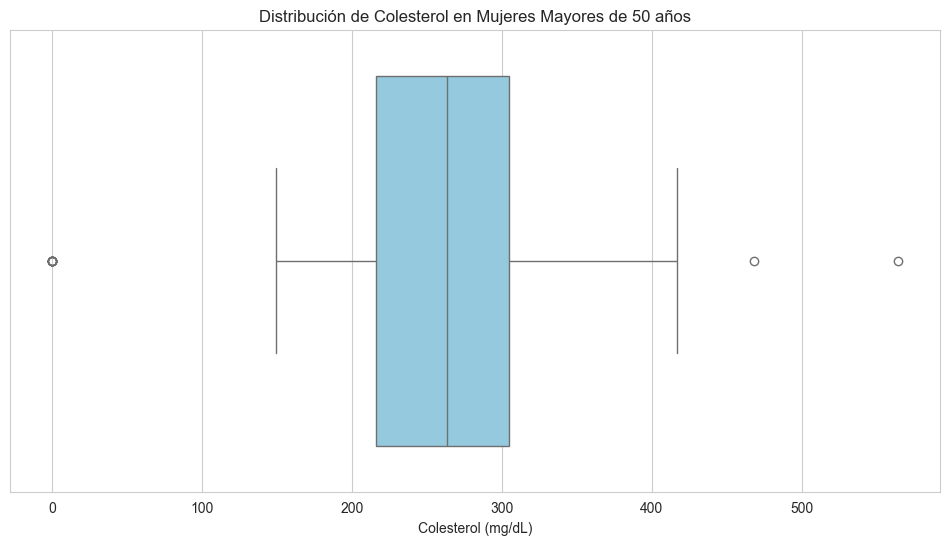

In [17]:
sns.set_style(style="whitegrid")

plt.figure(figsize=(12, 6))

sns.boxplot(data=df_menopausicas, x='Colesterol', color='skyblue')
plt.title('Distribución de Colesterol en Mujeres Mayores de 50 años')
plt.xlabel('Colesterol (mg/dL)')

plt.show()

Reviso los datos del campo correspondiente a niveles de colesterol mediante un describe

In [18]:
df_menopausicas["Colesterol"].describe()

count    122.000000
mean     252.909836
std       95.650017
min        0.000000
25%      216.000000
50%      263.500000
75%      304.750000
max      564.000000
Name: Colesterol, dtype: float64

Elimino mediante un filtro los valores correspondientes a 0 ya que no son compatibles con el estudio debido a que es imposible tener ese nivel de colesterol y para que no impacte de esta manera la media

In [19]:
df_menopausicas = df_menopausicas[df_menopausicas['Colesterol'] > 0]
df_menopausicas.describe()

,Edad,Presion_Arterial_Reposo,Colesterol,Frecuencia_Cardiaca_Max,Depresion_ST
count,113.000000,113.000000,113.000000,113.000000,113.000000
mean,58.035398,135.778761,273.053097,143.079646,0.838938
std,5.922007,19.028050,65.839339,20.412331,1.054365
min,50.000000,100.000000,149.000000,96.000000,0.000000
25%,54.000000,120.000000,225.000000,130.000000,0.000000
50%,57.000000,132.000000,269.000000,148.000000,0.600000
75%,62.000000,146.000000,307.000000,160.000000,1.300000
max,76.000000,200.000000,564.000000,179.000000,6.200000


También filtro los registros con niveles de colesterol superior a 400 mg/dl (niveles correspondientes a pacientes con hipercolesterolemia)

In [20]:
df_high_cholesterol = df_menopausicas[df_menopausicas['Colesterol'] > 400]
df_high_cholesterol

,Edad,Genero,Tipo_Dolor_Pecho,Presion_Arterial_Reposo,Colesterol,Glicemia_Basal_Mayor_120,ECG_Reposo,Frecuencia_Cardiaca_Max,Angina_Ejercicio,Depresion_ST,Pendiente_ST,Estado
28,53,femenino,angina atípica,113,468,falso,normal,127,no,0.0,subida,normal
618,67,femenino,dolor no anginoso,115,564,falso,hipertrofia del ventriculo izq,160,no,1.6,plano,normal
626,63,femenino,asintomático,150,407,falso,hipertrofia del ventriculo izq,154,no,4.0,plano,enfermedad cardiovascular
669,65,femenino,dolor no anginoso,140,417,verdadero,hipertrofia del ventriculo izq,157,no,0.8,subida,normal
798,56,femenino,asintomático,134,409,falso,hipertrofia del ventriculo izq,150,si,1.9,plano,enfermedad cardiovascular


Se observa que solo existen 2 outliers con cifras que pueden desviar la media, por lo que se decide eliminarlos, recortando los valores superiores al límite.
Se indica que el límite superior es 417, para no eliminar este registro del estudio.

In [21]:
limite_superior = 417

df_menopausicas['Colesterol'] = df_menopausicas['Colesterol'].clip(upper=limite_superior)

df_menopausicas['Colesterol'].describe()

count    113.000000
mean     271.300885
std       60.055017
min      149.000000
25%      225.000000
50%      269.000000
75%      307.000000
max      417.000000
Name: Colesterol, dtype: float64

Realizo el plotting posterior al manejo de los outliers

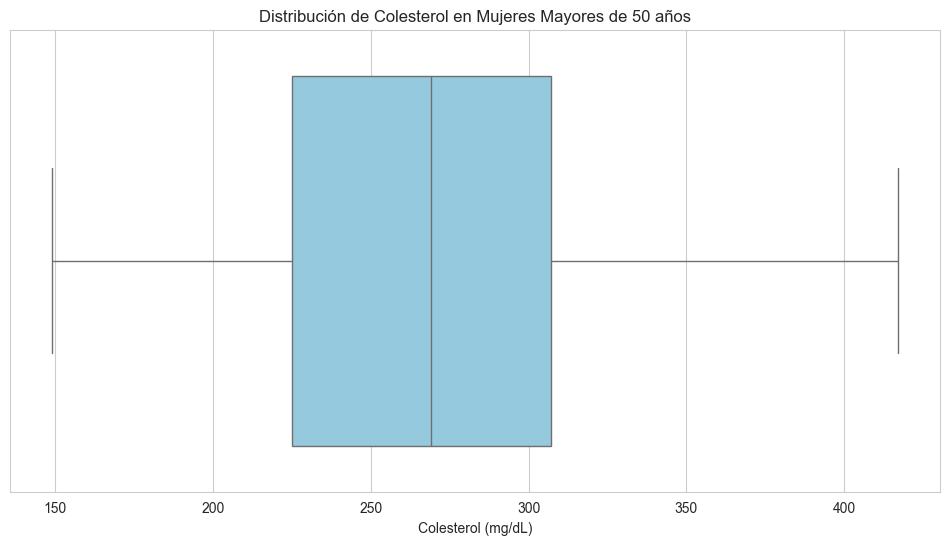

In [22]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=df_menopausicas, x='Colesterol', color='skyblue')
plt.title('Distribución de Colesterol en Mujeres Mayores de 50 años')
plt.xlabel('Colesterol (mg/dL)')

plt.show()

También es prudente observar la distribución de frecuencias de niveles de colesterol 

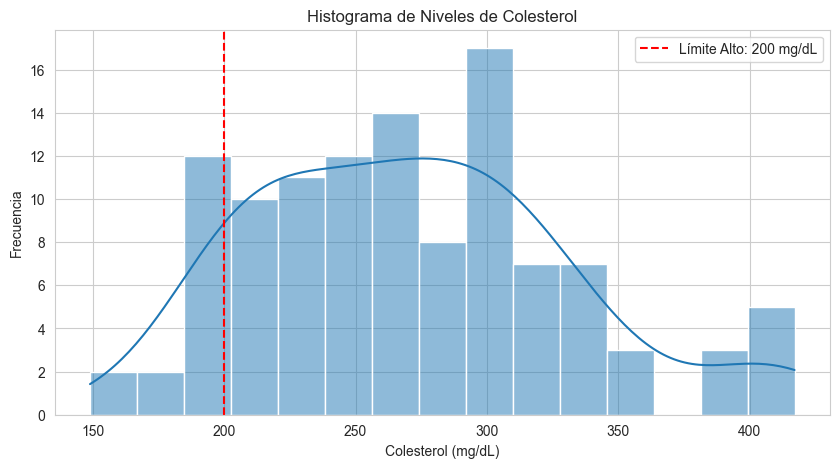

In [23]:
plt.figure(figsize=(10, 5))
sns.histplot(df_menopausicas['Colesterol'], bins=15, kde=True)
plt.title('Histograma de Niveles de Colesterol')
plt.xlabel('Colesterol (mg/dL)')
plt.ylabel('Frecuencia')
plt.axvline(x=200, color='r', linestyle='--', label='Límite Alto: 200 mg/dL')
plt.legend()
plt.show()

### Observo si existen outliers entre los datos correspondientes a presión arterial y realizo los cambios para eliminarlos o transformarlos

En el dataset solo se encuentra la presión arterial sistólica ya que esta es una medición importante entre los factores de riesgo a evaluar para realizar el diagnóstico de enfermedades cardiovasculares en individuos con edad mayor a 50 años
https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings

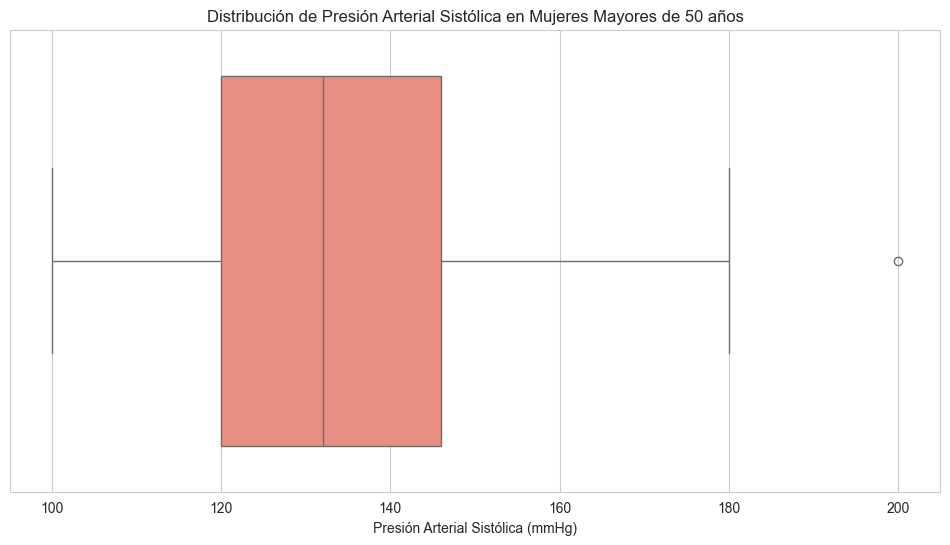

In [24]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=df_menopausicas, x='Presion_Arterial_Reposo', color='salmon')
plt.title('Distribución de Presión Arterial Sistólica en Mujeres Mayores de 50 años')
plt.xlabel('Presión Arterial Sistólica (mmHg)')

plt.show()

In [25]:
df_menopausicas["Presion_Arterial_Reposo"].describe()

count    113.000000
mean     135.778761
std       19.028050
min      100.000000
25%      120.000000
50%      132.000000
75%      146.000000
max      200.000000
Name: Presion_Arterial_Reposo, dtype: float64

Solo existe un outlier en esta variable, y ya que se encuentra relacionada con la investigación y eliminarlo puede comportar eliminar un registro importante, he decidido dejarlo

In [26]:
heartdisease.to_csv('heartdiseasefem_procesado.csv', index=False, encoding='utf-8')

# Objetivo general:

# Analizar las posibles relaciones entre la edad, el nivel de colesterol en sangre y la presión arterial en mujeres mayores de 50 años, con el fin de identificar patrones y asociaciones que puedan contribuir al entendimiento de factores de riesgo cardiovasculares en esta población.

Calculo la matriz de correlación de Pearson entre todas las variables tras haber hecho manejo de los outliers

In [27]:
correlation_matrix = df_menopausicas[['Edad', 'Colesterol', 'Presion_Arterial_Reposo']].corr(method='pearson')

print("Matriz de correlación de Pearson:")
print(correlation_matrix)

Matriz de correlación de Pearson:
                             Edad  Colesterol  Presion_Arterial_Reposo
Edad                     1.000000    0.024724                 0.150142
Colesterol               0.024724    1.000000                 0.091663
Presion_Arterial_Reposo  0.150142    0.091663                 1.000000


1. **Correlación entre Edad y Colesterol:** 0.0247
   - Este valor es cercano a 0, lo que sugiere una correlación muy débil entre la edad y el nivel de colesterol en este grupo.

2. **Correlación entre Edad y Presión Arterial en Reposo:** 0.1501
   - Este coeficiente muestra una correlación positiva débil entre la edad y la presión arterial en reposo. Sin embargo, la fuerza de esta relación es baja y puede no ser significativa sin una prueba de p-value que confirme su relevancia estadística.

3. **Correlación entre Colesterol y Presión Arterial en Reposo:** 0.0917
   - También es un valor cercano a 0, indicando una relación muy débil entre el colesterol y la presión arterial en reposo, lo que sugiere que en este grupo no existe una asociación fuerte entre estos dos factores.

Estos resultados indican que no se observan correlaciones fuertes entre ninguna de las variables (edad, colesterol, y presión arterial en reposo) en el grupo de mujeres mayores de 50 años de este conjunto de datos.

Esto se observa en el heatmap de una forma más gráfica

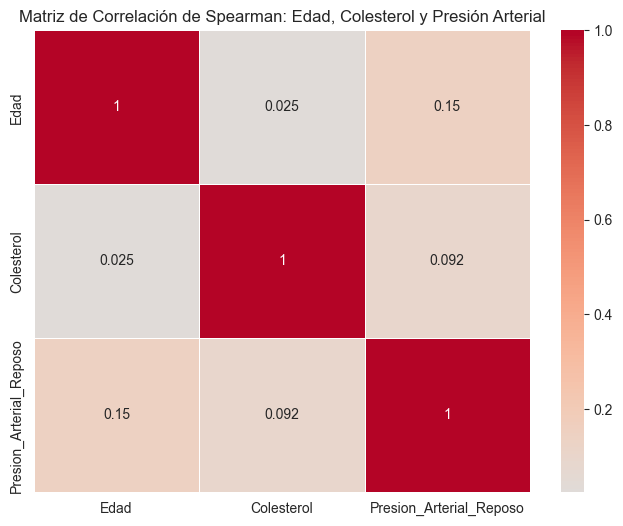

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Matriz de Correlación de Spearman: Edad, Colesterol y Presión Arterial")
plt.show()


### 1. Analizar la relación entre la edad y el nivel de colesterol en sangre en mujeres de 50 años en adelante para identificar si la edad es un factor asociado con el colesterol en este grupo.


In [29]:
corr_edad_col, p_value_edad_col = pearsonr(df_menopausicas['Edad'], df_menopausicas['Colesterol'])
print(f"Coeficiente de correlación entre edad y colesterol: {corr_edad_col}, P-value: {p_value_edad_col}")

Coeficiente de correlación entre edad y colesterol: 0.024723517540341692, P-value: 0.7949160855218328


- Correlación: El coeficiente de 0.0247 es muy cercano a 0, lo que sugiere una correlación extremadamente débil entre la edad y el colesterol en este grupo de mujeres mayores de 50 años. En términos prácticos, esto indica que la edad no tiene una relación lineal significativa con los niveles de colesterol en sangre en esta población.

- Significancia estadística: El p-value de 0.795 es mucho mayor que el umbral común de 0.05, lo que significa que la relación observada no es estadísticamente significativa.

Este resultado indica que, en este conjunto de datos, la edad no parece ser un factor asociado con el nivel de colesterol en mujeres mayores de 50 años.

### 2. Examinar la relación entre la edad y la presión arterial en mujeres de 45 años en adelante para determinar si la presión arterial tiende a variar con la edad en esta población.

In [30]:
# Correlación entre edad y presión arterial en reposo
corr_edad_pa, p_value_edad_pa = pearsonr(df_menopausicas['Edad'], df_menopausicas['Presion_Arterial_Reposo'])
print(f"Coeficiente de correlación entre edad y presión arterial: {corr_edad_pa}, P-value: {p_value_edad_pa}")



Coeficiente de correlación entre edad y presión arterial: 0.15014180755542683, P-value: 0.11244580328926469


- Correlación: El coeficiente de 0.1501 indica una correlación positiva débil entre la edad y la presión arterial en este grupo de mujeres mayores de 50 años. Aunque hay una tendencia leve, la fuerza de esta relación es bastante baja.

- Significancia estadística: El p-value de 0.112 es superior al umbral común de 0.05, lo cual sugiere que la relación observada no es estadísticamente significativa. Esto significa que no podemos afirmar con confianza que la edad esté asociada con cambios en la presión arterial en esta población; la relación observada podría ser aleatoria.

En resumen, no hay evidencia suficiente para concluir que exista una relación estadísticamente significativa entre la edad y la presión arterial en reposo en este grupo.

### 3. Explorar la relación entre el nivel de colesterol y la presión arterial en mujeres de 45 años en adelante para evaluar si los niveles de colesterol están asociados con variaciones en la presión arterial, considerando su impacto fisiológico en la circulación.

In [31]:
# Correlación entre colesterol y presión arterial en reposo
corr_col_pa, p_value_col_pa = pearsonr(df_menopausicas['Colesterol'], df_menopausicas['Presion_Arterial_Reposo'])
print(f"Coeficiente de correlación entre colesterol y presión arterial: {corr_col_pa}, P-value: {p_value_col_pa}")

Coeficiente de correlación entre colesterol y presión arterial: 0.09166272440721172, P-value: 0.3342499310742347


- Correlación: El coeficiente de 0.0917 sugiere una correlación positiva muy débil entre el colesterol y la presión arterial en reposo. Este valor cercano a 0 indica que prácticamente no hay una relación lineal entre estas dos variables en este grupo de mujeres mayores de 50 años.

- Significancia estadística: El p-value de 0.334 es considerablemente mayor que el umbral de 0.05, lo que indica que esta relación no es estadísticamente significativa. En otras palabras, la asociación observada entre el colesterol y la presión arterial en reposo probablemente sea aleatoria en este conjunto de datos.

En conclusión, no se observa una relación significativa entre los niveles de colesterol y la presión arterial en reposo para esta población.

Text(0.5, 1.03, 'Correlación entre edad y Niveles de Colesterol')

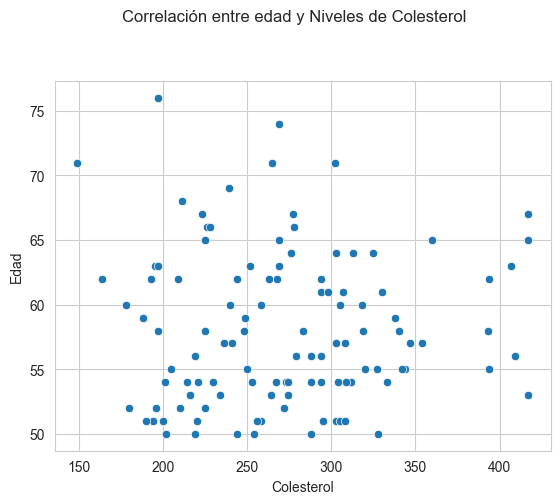

In [32]:
col_edad= sns.scatterplot(data= df_menopausicas, x = "Colesterol", y="Edad")
col_edad.figure.suptitle('Correlación entre edad y Niveles de Colesterol', y=1.03)

Text(0.5, 1.03, 'Correlación entre Presión Arterial Sistólica en Reposo y Edad')

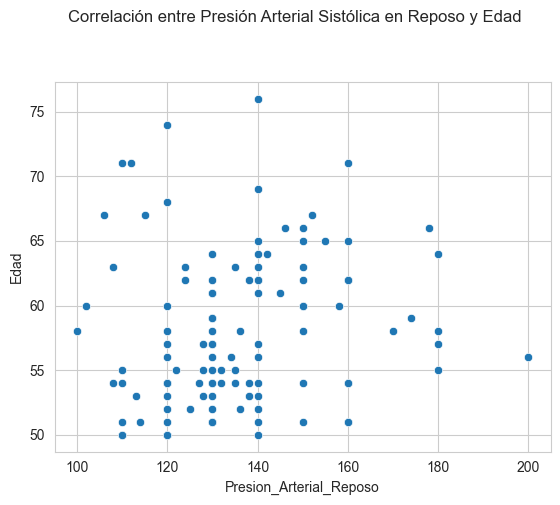

In [33]:
PAR_edad= sns.scatterplot(data= df_menopausicas, x = "Presion_Arterial_Reposo", y="Edad")
PAR_edad.figure.suptitle('Correlación entre Presión Arterial Sistólica en Reposo y Edad', y=1.03)

Text(0.5, 1.03, 'Correlación entre Colesterol y PA Sistólica en Reposo')

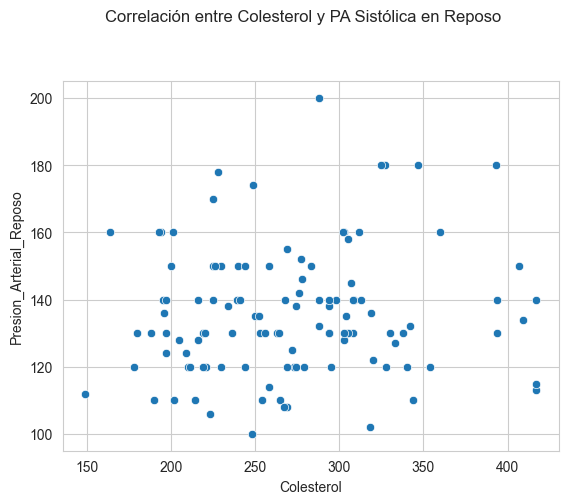

In [34]:
PAR_Col =sns.scatterplot(data= df_menopausicas, x = "Colesterol", y="Presion_Arterial_Reposo")
PAR_Col.figure.suptitle('Correlación entre Colesterol y PA Sistólica en Reposo', y=1.03)